# Exploratory Data Analysis - Retail

* Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'
* As a business manager, try to find out the weak areas where you can   work to make more profit
* What all business problems you can derive by exploring the data?
* I used the tool Python and Excel

### Author - Simsima Gafoor

### Importing necessary Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading and Displaying the dataset SampleSuperstore

In [3]:
data=pd.read_csv("SampleSuperstore.csv")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.shape

(9994, 13)

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [17]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Let's check null values

In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### There is no null value present

In [8]:
data.Quantity.value_counts()

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [10]:
data["Sub-Category"].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

# EDA

Let's start visualization. 
### The purpose of EDA in data science is
In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.

## Category vs Sales

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


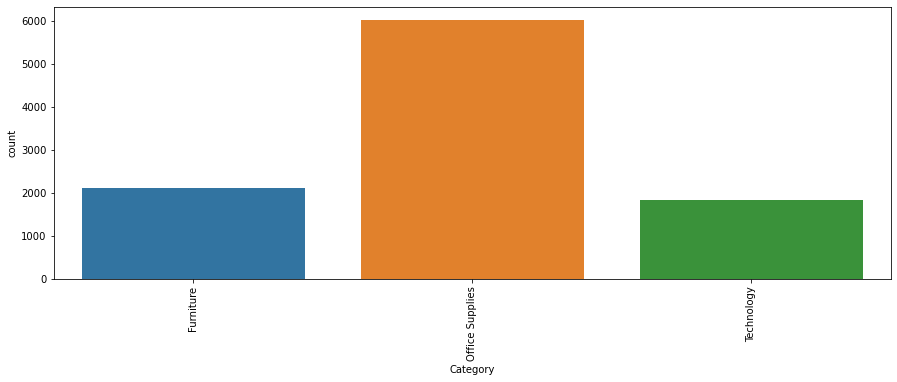

In [20]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data.Category)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### From this graph, Office Supplies having more sales

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


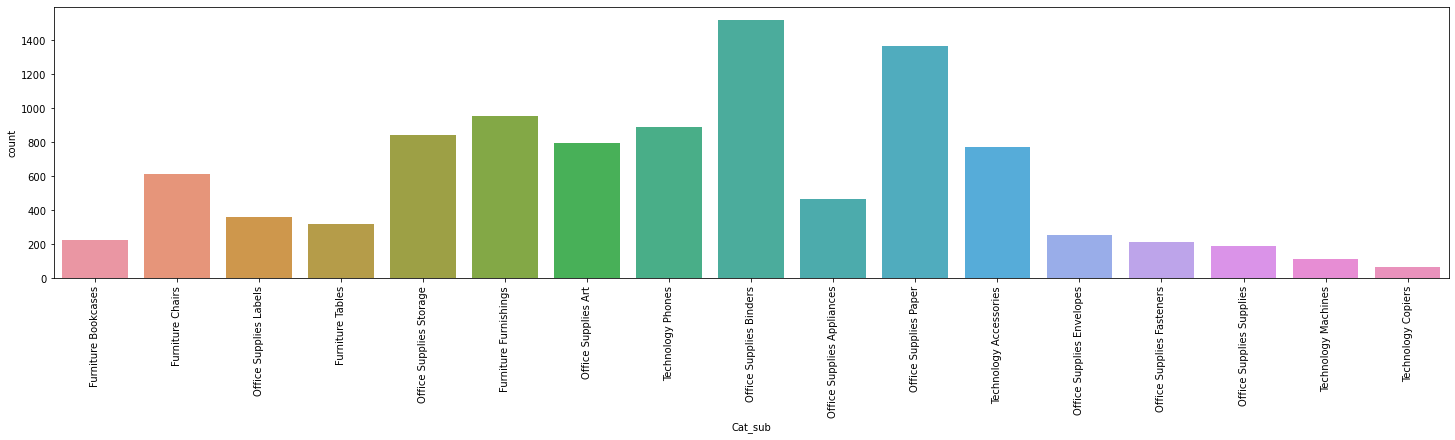

In [11]:
plt.figure(figsize=(25,5))
s1=sns.countplot(data.Cat_sub)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In this graph , we can see that more saled products are "Office Supplies Art" and "Office Supplies Paper".
Also some product has only very less sales

## Category vs Profit

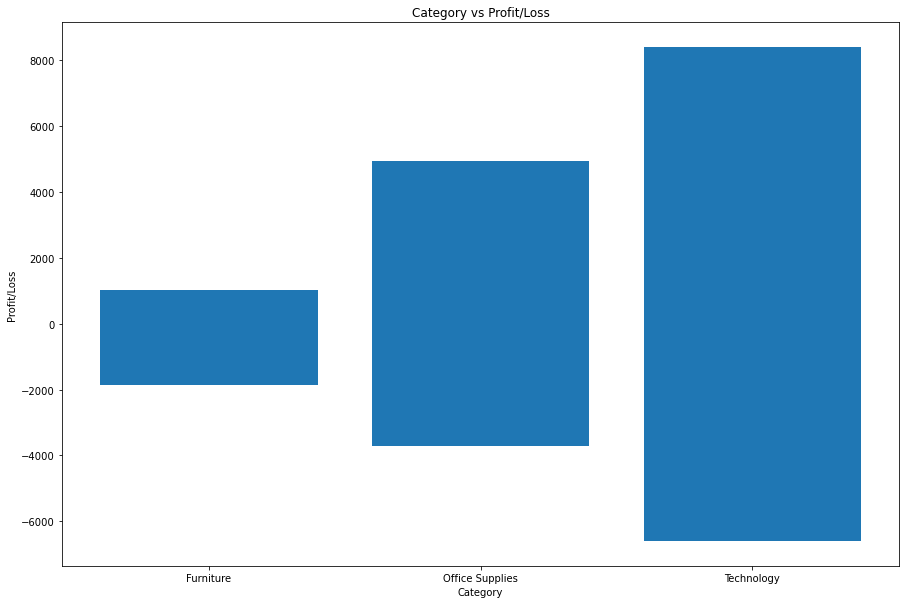

In [18]:
plt.figure(figsize=(15,10))
a=data['Category']
b=data['Profit']
plt.bar(a,b)
plt.title('Category vs Profit/Loss')
plt.xlabel('Category')
plt.ylabel('Profit/Loss')
plt.show()


### In this graph, we can see the category Technology having more profit,at the same time they having more loss


## SubCategory vs Profit

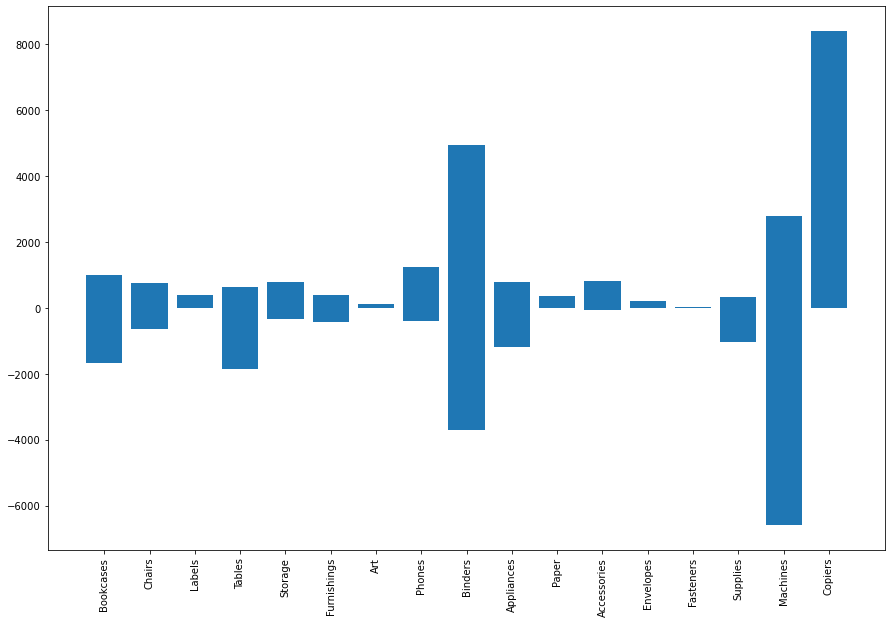

In [33]:
plt.figure(figsize=(15,10))
a=data['SubCategory']
b=data['Profit']
plt.bar(a,b)
plt.xticks(rotation=90)
plt.show()

### Copiers subcategory having more profit. Machines having low performance,so they having high loss


## Sales and Profit based upon Subcategory

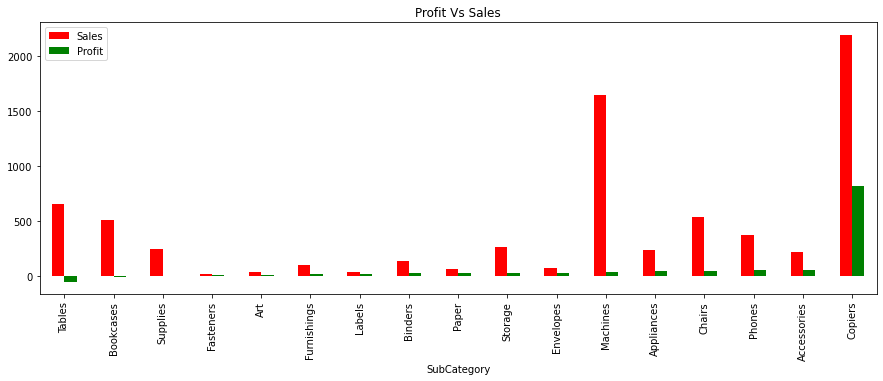

In [32]:
d1=data.groupby('SubCategory')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=True)
d1[:].plot.bar(color=['red','green'],figsize=(15,5))
plt.title("Profit Vs Sales")
plt.xlabel('SubCategory')
plt.xticks(rotation=90)
plt.show()


#### From this graph, Copiers having more sales and getting more profit aslo. Machines are getting high sales but neglected amount of profit only.

## Region wise Profit and Sales

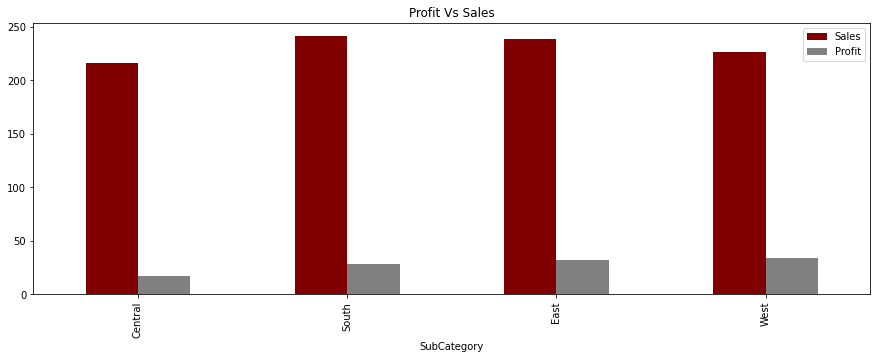

In [15]:
d2=data.groupby('Region')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=True)
d2[:].plot.bar(color=['maroon','grey'],figsize=(15,5))
plt.title("Profit Vs Sales")
plt.xlabel('SubCategory')
plt.show()

#### In the West region having more profit

## State wise Sales and Profit

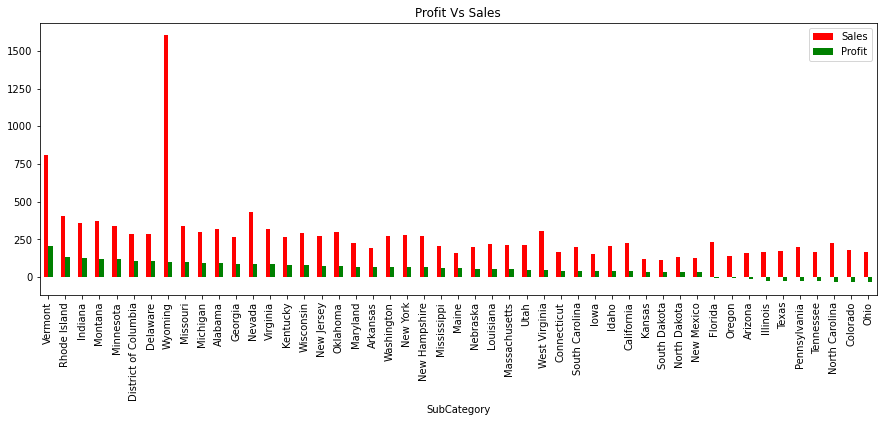

In [19]:
d3=data.groupby('State')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=False)
d3[:].plot.bar(color=['red','green'],figsize=(15,5))
plt.title("Profit Vs Sales")
plt.xlabel('SubCategory')
plt.show()

#### Comparing with other SubCategory, Wyoming is getting high sales and also they having high amount of loss also

## Segment wise Sales and Profit

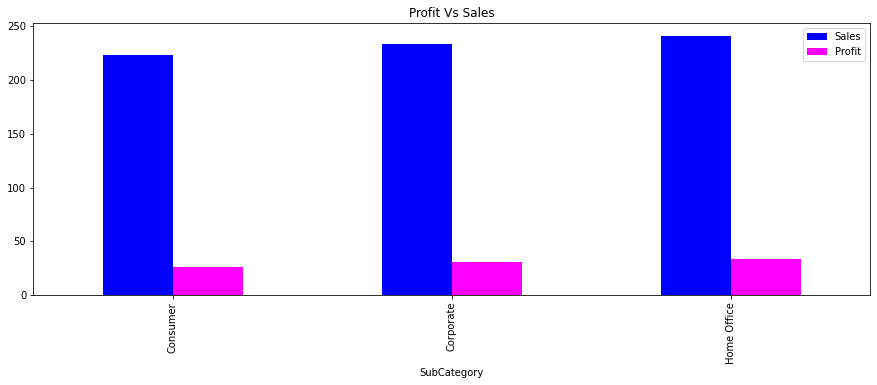

In [18]:
d4=data.groupby('Segment')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=True)
d4[:].plot.bar(color=['blue','magenta'],figsize=(15,5))
plt.title("Profit Vs Sales")
plt.xlabel('SubCategory')
plt.show()

#### From this graph, three of this category having high sales but profit is very less  

## Ship Mode wise Sales and Profit

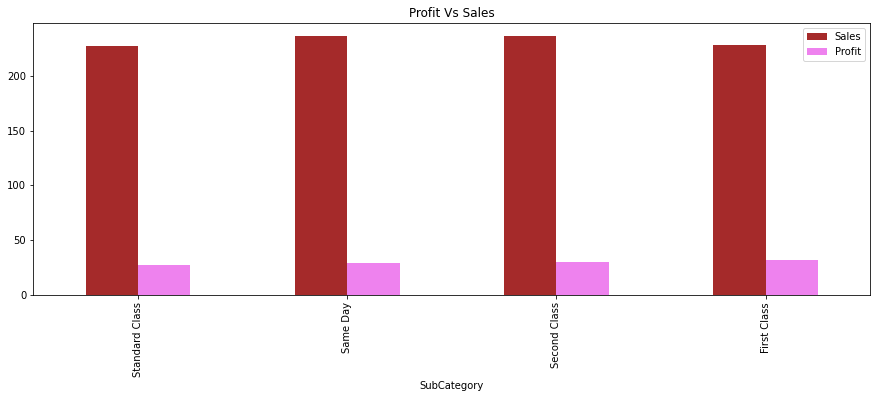

In [19]:
d4=data.groupby('Ship Mode')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=True)
d4[:].plot.bar(color=['brown','violet'],figsize=(15,5))
plt.title("Profit Vs Sales")
plt.xlabel('SubCategory')
plt.show()

#### Here First Class Ship Mode is better than other Ship Mode 

## Sub Category wise Sales and Profit

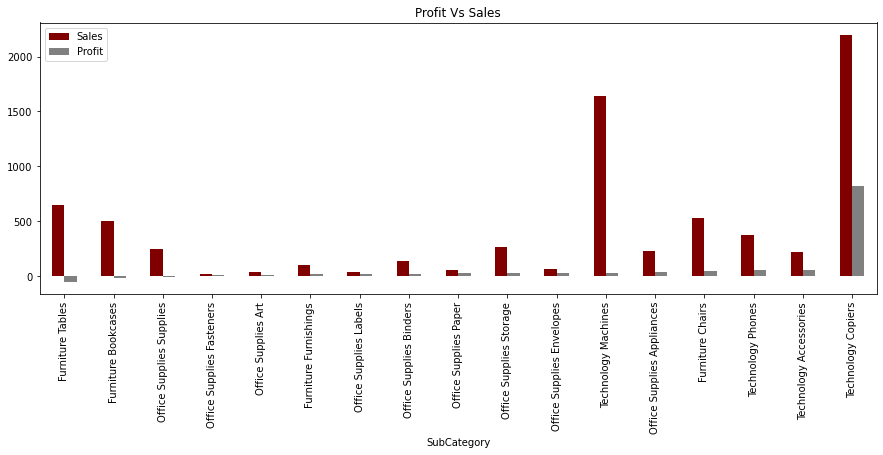

In [21]:
d2=data.groupby('Cat_sub')[['Sales','Profit']].mean().sort_values(by='Profit',ascending=True)
d2[:].plot.bar(color=['maroon','gray'],figsize=(15,5))
plt.title("Profit Vs Sales")
plt.xlabel('SubCategory')
plt.show()

#### Technology Copiers having high sales and profit and Technology Machines having low perfrmance, neglected amount of Profit, they having high amount of loss.

## Correlation between features

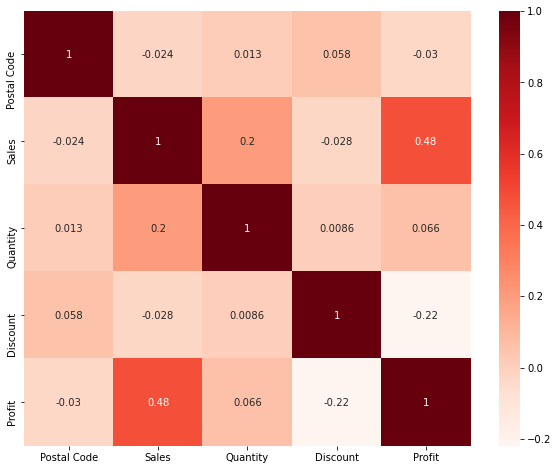

In [22]:
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(data.corr(), cmap="Reds", annot=True)
plt.show()

# The heatmap shows that:

1. Sales and Profit are Positively Correlated
2. Discount and Profit are Negatively Correlated
3. Quantity and Profit are less Moderately Correlated

## Scatter Plot - Discount vs Profit

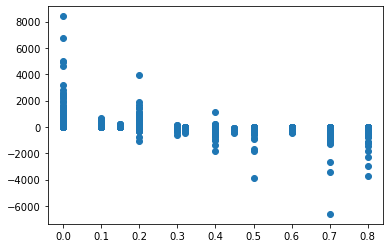

In [23]:
x=data['Discount']
y=data['Profit']

plt.scatter(x,y)
plt.show()

#### From this graph, we can conclude that by the increase of Discount, Profit is gradually decreasing

## Bar graph - Discount vs Sub category

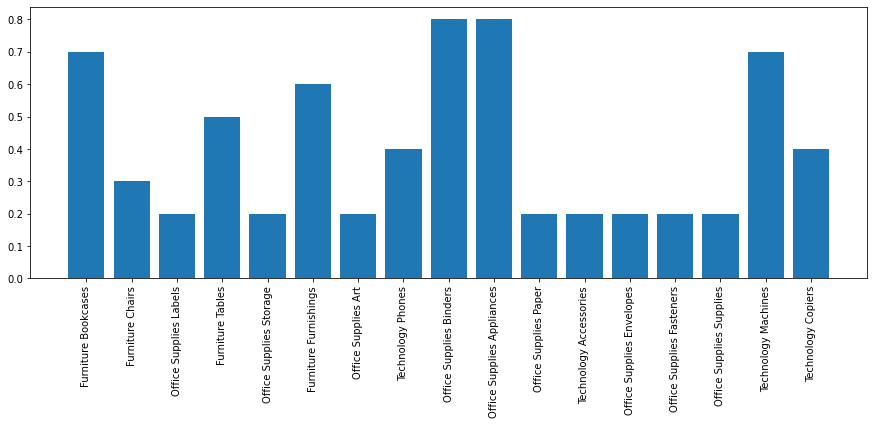

In [24]:
plt.figure(figsize=(15,5))
a=data['Cat_sub']
b=data['Discount']
plt.xticks(rotation=90)
plt.bar(a,b)

plt.show()


#### Both Binders and Appliances from Office suppliers having high discount

## Pair Plot 

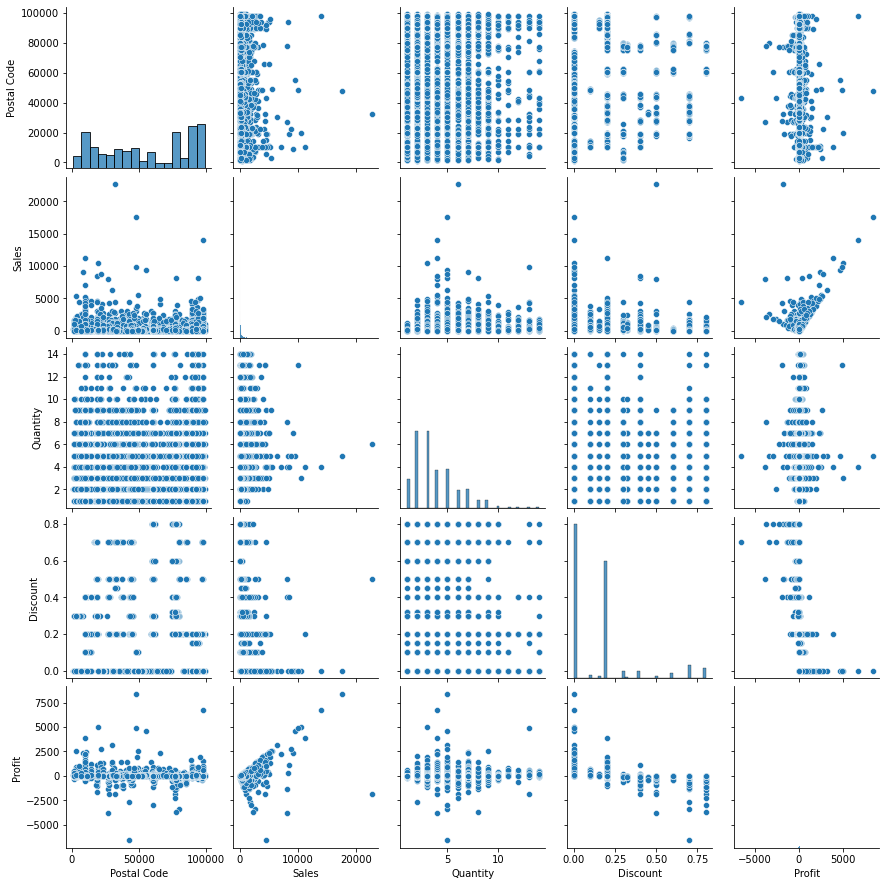

In [25]:
sns.pairplot(data)

## Histogram - Sales

(array([9.876e+03, 9.100e+01, 1.300e+01, 6.000e+00, 5.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([4.44000000e-01, 2.26424760e+03, 4.52805120e+03, 6.79185480e+03,
        9.05565840e+03, 1.13194620e+04, 1.35832656e+04, 1.58470692e+04,
        1.81108728e+04, 2.03746764e+04, 2.26384800e+04]),
 <BarContainer object of 10 artists>)

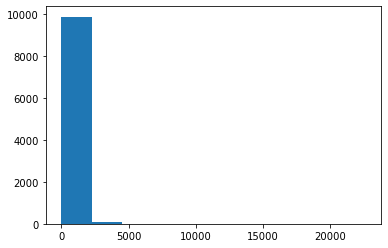

In [26]:
plt.hist(data['Sales'])

## Distribution Plot - Discount 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Discount', ylabel='Density'>

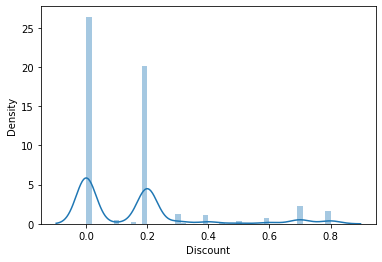

In [27]:
sns.distplot(data['Discount'])

#### depicts variation in the discount distribution which is decreasing gradually

# 

## Sales vs Segment with Category

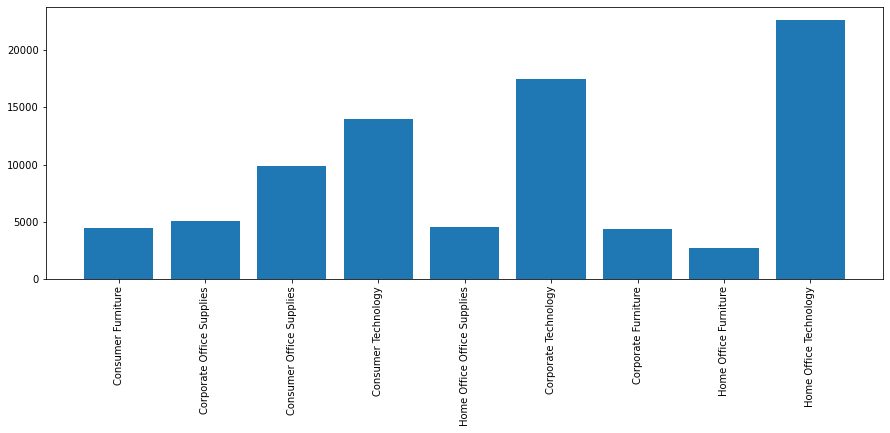

In [28]:
plt.figure(figsize=(15,5))
a=data['Seg_cat']
b=data['Sales']
plt.xticks(rotation=90)
plt.bar(a,b)

plt.show()


#### Home Office Technology having high sales


## Bar Graph - Sales vs Segment with category

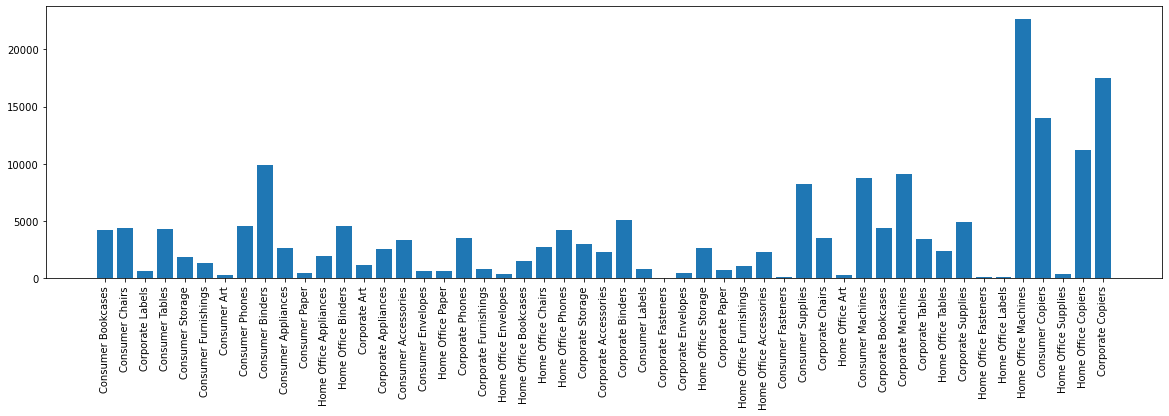

In [29]:
plt.figure(figsize=(20,5))
a=data['Seg_SubCat']
b=data['Sales']
plt.xticks(rotation=90)
plt.bar(a,b)

plt.show()

#### In this graph, from segment Home Office the category Machines have high amount of Sales.From corporate, Copiers segment also have more Sales.

## Count Plot - State Segment

<AxesSubplot:xlabel='count', ylabel='StateSegment'>

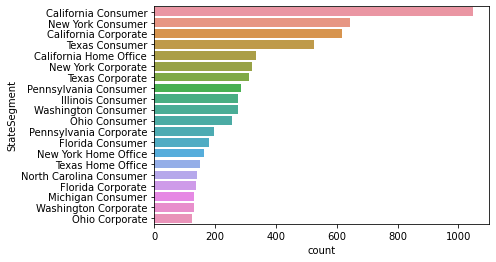

In [30]:
sns.countplot(y='StateSegment',data=data,order=data.StateSegment.value_counts().iloc[:20].index)

#### In this graph, consumer segment is more in California

# Observation and Conclusions

* Category Technology having high Profit and Furniture having less profit, so more focus on the sales of Technology
* Copiers Sub Category have high profit, so increase the sales of Copiers and decrease the sales of Machine to inrease the 
  profit
* From the West Region having high profit,but their sales is less. By Increasing sales, profit can increase
* By looking into the State, Wyoming have highest sales, but their profit is very less so make less sales in Wyoming
* By increasing the sales in Varmont,then their profit will also increase
* In ship mode, First class have more profit,but sales is less. So increase the sales in First Class
* In Sub Category, decrease the sales in Technology Machines and Furniture Tables then can increase the profit
* Sales and Profit are Positively Correlated
* Discount and Profit are Negatively Correlated
* Quantity and Profit are Moderately Correlated
* Decrease the amount of Discount then can increase the profit


  Thankyou


